# Assignment A2: Predicting Car Price From Scratch
## Nutdanai Sritunya MMI st123055

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import matplotlib

# 1. Load and preparing datasets

In [2]:
df = pd.read_csv('./Cars.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# That mean you data have 12 feature and 1 label 
df.shape

(8128, 13)

In [5]:
# Check Dtypes of your input data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


you will see that are so many object type so we need to do something with this first. Follow the instruction of Chaky, First we need to
- map First owner to 1, ..., Test Drive Car to 5

In [6]:
le = LabelEncoder()
print(set(df["owner"]))
df["owner"] = le.fit_transform(df["owner"])+1

{'Fourth & Above Owner', 'Second Owner', 'First Owner', 'Third Owner', 'Test Drive Car'}


In [7]:
df["owner"]

0       1
1       3
2       5
3       1
4       1
       ..
8123    1
8124    2
8125    1
8126    1
8127    1
Name: owner, Length: 8128, dtype: int32

In [8]:
le.transform(['First Owner'])

array([0])

In [9]:
set(df["owner"]) #Now the owner feature is already map to number

{1, 2, 3, 4, 5}

• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [10]:
df['fuel'].value_counts() #Before

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [11]:
df_filtered = df.loc[~df['fuel'].isin(['CNG', 'LPG'])]
df_filtered['fuel'].value_counts() #After

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [12]:
df_filtered['mileage'][0]

'23.4 kmpl'

In [13]:
# Remove the "kmpl" by split and select the first object ['23.4', 'kmpl'] and convert to float
df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_24812\3418012339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)


- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [14]:
df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_24812\3239265068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)


- Do the same for max power

In [15]:
df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp\ipykernel_24812\1974573241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)


 For the feature brand, take only the first word and remove the rest

In [16]:
df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]

C:\Users\earth\AppData\Local\Temp\ipykernel_24812\81196181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]


Drop the feature torque, simply because Chaky’s company does not understand well about it

In [17]:
df_filtered = df_filtered.drop('torque', axis=1)

- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [18]:
le.transform(["Test Drive Car"])

array([3])

In [19]:
print(df_filtered['owner'].unique(), df_filtered['owner'].count()) #the owner feature before we delete Test drive car
df_filteredd = df_filtered[df_filtered['owner'] != 3] #we know Test drive car is map to 3
print(df_filteredd['owner'].unique(), df_filteredd['owner'].count()) #the owner after deleted

[1 3 5 2 4] 8033
[1 5 2 4] 5960


- Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [20]:
df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])

C:\Users\earth\AppData\Local\Temp\ipykernel_24812\2761593400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])


Finally this is a clean data after do following step.

In [21]:
df_filteredd.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,5,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,12.994530,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0


In [22]:
df_filteredd.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,5960.000000,5960.000000,5.960000e+03,5960.000000,5831.000000,5831.000000,5837.000000,5831.000000
mean,2014.561074,13.105088,6.268093e+04,1.398154,19.637210,1456.294461,93.591889,5.401475
std,3.835775,0.836889,4.965373e+04,1.160271,3.998052,496.104314,37.144458,0.944711
min,1983.000000,10.308919,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2012.000000,12.611538,2.809500e+04,1.000000,16.950000,1197.000000,70.000000,5.000000
50%,2016.000000,13.122363,5.458500e+04,1.000000,19.610000,1248.000000,83.140000,5.000000
75%,2017.000000,13.507626,9.000000e+04,1.000000,22.540000,1582.000000,103.500000,5.000000
max,2020.000000,16.118096,1.500000e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [23]:
df_filteredd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5960 non-null   object 
 1   year           5960 non-null   int64  
 2   selling_price  5960 non-null   float64
 3   km_driven      5960 non-null   int64  
 4   fuel           5960 non-null   object 
 5   seller_type    5960 non-null   object 
 6   transmission   5960 non-null   object 
 7   owner          5960 non-null   int32  
 8   mileage        5831 non-null   float64
 9   engine         5831 non-null   float64
 10  max_power      5837 non-null   float64
 11  seats          5831 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 582.0+ KB


## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Boxplot

<AxesSubplot:xlabel='seats', ylabel='count'>

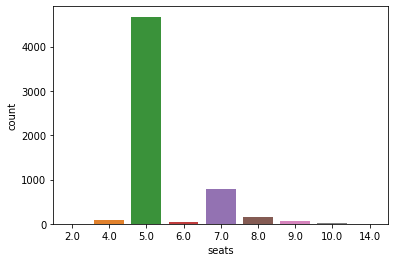

In [24]:
# most of data in this datasets is 5 seats car.
sns.countplot(data = df_filteredd, x = 'seats')

<AxesSubplot:xlabel='transmission', ylabel='count'>

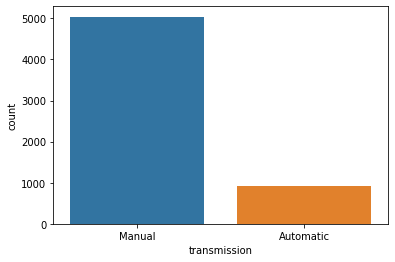

In [25]:
sns.countplot(data = df_filteredd, x = 'transmission')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

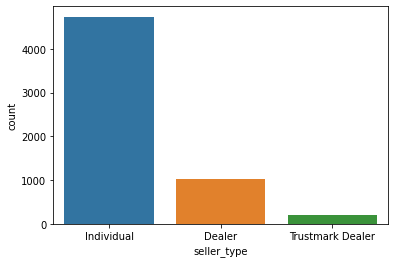

In [26]:
sns.countplot(data = df_filteredd, x = 'seller_type')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

<AxesSubplot:>

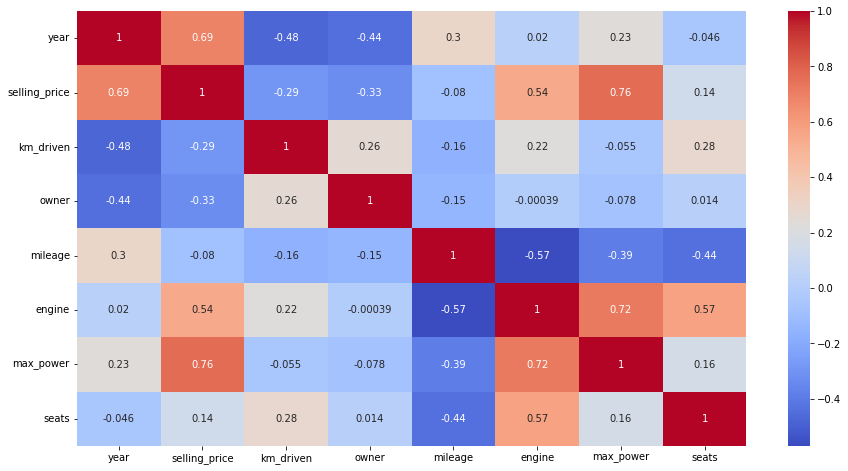

In [27]:
filtered_corr = df_filteredd.corr()
plt.figure(figsize = (15,8))
sns.heatmap(filtered_corr,  annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='x', ylabel='y'>

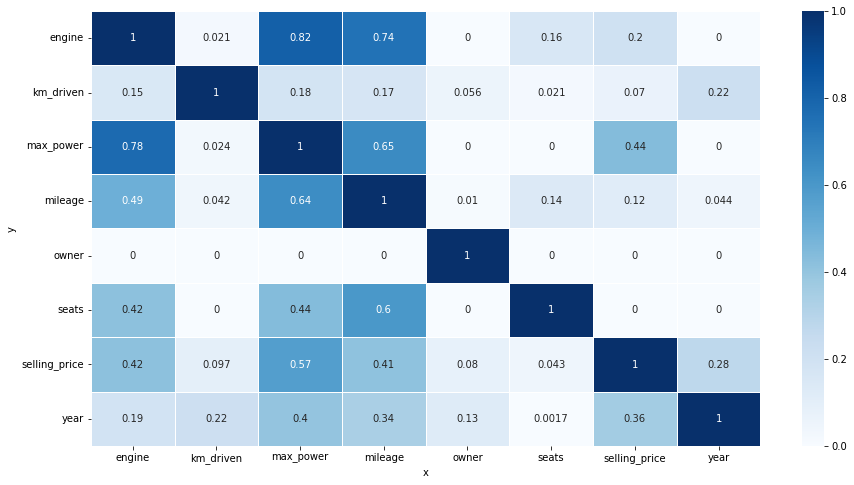

In [28]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_filteredd.copy()
dfcopy.drop([ 'transmission', 'name', 'seller_type', 'fuel'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature selection

In [29]:
X = dfcopy[['engine', 'max_power', 'year']]
y = dfcopy["selling_price"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [31]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       98
max_power    95
year          0
dtype: int64

In [32]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       31
max_power    28
year          0
dtype: int64

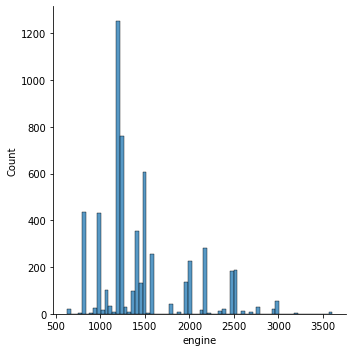

In [33]:
sns.displot(data=dfcopy, x='engine')

In [34]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [35]:
dfcopy['engine'].median()

1248.0

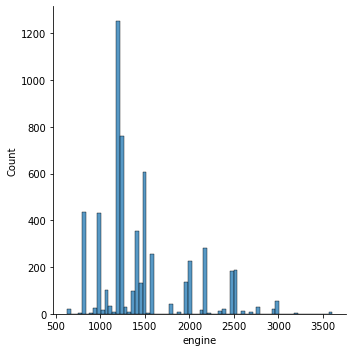

In [36]:
sns.displot(data=dfcopy, x='engine')

In [37]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [38]:
dfcopy['engine'].median()

1248.0

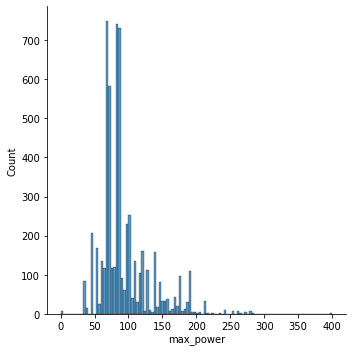

In [39]:
sns.displot(data=dfcopy, x='max_power')

In [40]:
mode_value = dfcopy['max_power'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 74.0


In [41]:
dfcopy['max_power'].median()

83.14

In [42]:
dfcopy['max_power'].mean()

93.59188881274628

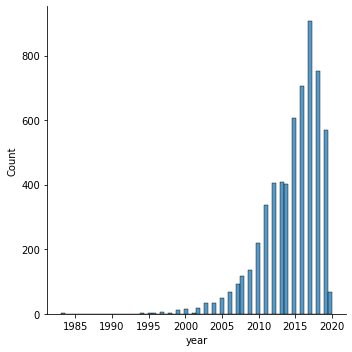

In [43]:
sns.displot(data=dfcopy, x='year')

In [44]:
mode_value = dfcopy['year'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 2017


In [45]:
dfcopy['year'].median()

2016.0

In [46]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

In [47]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [48]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

In [49]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

#### Check the outliner

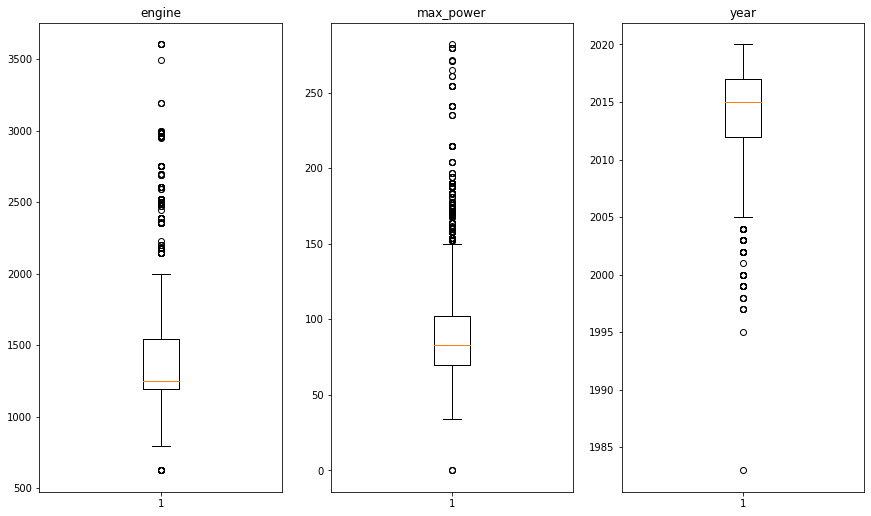

In [50]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,50))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [51]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [52]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 611
Percent of data that is outlier: 14.65%

---------------max_power---------------

Number of outliers: 353
Percent of data that is outlier: 8.46%

---------------year---------------

Number of outliers: 91
Percent of data that is outlier: 2.18%


## 4.Preprocessing

#### Scaler

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import pickle as pkl

In [57]:
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

In [58]:
X_train_poly  = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_train_poly)
X_test_poly  = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_test_poly)

scaler_potly = StandardScaler()
X_train_poly = scaler_potly.fit_transform(X_train_poly)
X_test_poly  = scaler_potly.transform(X_test_poly)

intercept = np.ones((X_train_poly.shape[0], 1))
X_train_poly   = np.concatenate((intercept, X_train_poly), axis=1)
intercept = np.ones((X_test_poly.shape[0], 1))
X_test_poly    = np.concatenate((intercept, X_test_poly), axis=1)

In [60]:
X_train_poly.shape

(4172, 10)

In [61]:
with open ("scaler_poly.pkl", "wb") as file :
    pkl.dump(scaler_potly, file)

In [62]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [66]:
with open ("scaler.pkl", "wb") as file :
    pkl.dump(scaler, file)

In [63]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4172, 3)
Shape of X_test:  (1788, 3)
Shape of y_train:  (4172,)
Shape of y_test:  (1788,)


In [64]:
y_train = y_train.values
y_test = y_test.values

In [65]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [60]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Earth"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="experiment_1_ml")

2023/09/13 22:44:14 INFO mlflow.tracking.fluent: Experiment with name 'experiment_1_ml' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/635658241441554693', creation_time=1694619854682, experiment_id='635658241441554693', last_update_time=1694619854682, lifecycle_stage='active', name='experiment_1_ml', tags={}>

## 5.Modeling

In [61]:
from sklearn.model_selection import KFold
import pandas as pd
class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self,regularization, lr=0.001,method='batch', num_epochs=1000, batch_size=254, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.prev_step = 0
        self.moment = True
        # self.weight_init = weight_init

    def r2 (self, ytrue, ypred) :
        y_bar = np.mean(ytrue)
        ssres = ((ypred - ytrue) ** 2).sum()
        sstot = ((ypred - y_bar) ** 2).sum()

        r2 = 1 - (ssres/sstot)
        return r2
    
    def mse(self, ytrue, ypred):

        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def xaviar (self, size) :
        m = size
        lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
        numbers = np.random.rand(m)
        scaled = lower + numbers * (upper - lower)
        return scaled
    
    def fit(self, weight_init,moment ,X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if weight_init == 'zero' :
                self.theta = np.zeros(X_cross_train.shape[1])
            else :
                self.theta = self.xaviar(X_cross_train.shape[1])  

            if moment == True :
                self.moment = True
            else : 
                self.moment = False  
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            y_method_train = np.array([y_method_train])
                            train_loss, train_loss_r2 = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss, train_loss_r2 = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss, train_loss_r2 = self._train(X_method_train, y_method_train)


                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    mlflow.log_metric(key="train_loss_r2", value=train_loss_r2, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_loss_new_r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss_mse", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_loss_r2", value=val_loss_new_r2, step=epoch)
                    #record dataset
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: mse: {val_loss_new} r2: {val_loss_new_r2}")
            
    def update_weight(self, grad, moment) :
        step = self.lr * grad
        if moment == True :
            tt = self.theta - step + 0.5 * self.prev_step
        else :
            tt = self.theta - self.lr * grad
        return tt    

    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        # self.theta = self.theta - self.lr * grad
        self.theta = self.update_weight(grad, self.moment)
        if self.method == 'sto' :
            y = np.array([y])
        return self.mse(y, yhat), self.r2(y, yhat)

    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

in the function above i add the function for calculate the R-sqaure score 

### R-square
`SSres = Σ(yᵢ - ȳ)² `

`SStot = Σ(yᵢ - ȳ)²`

`R² = 1 - (SSres / SStot)`

and also add the init weight method with xaviar

Now we can create `Ridge`, `Lasso` and `Elastic` class that extends the `LinearRegression`, with added penalty.

In [62]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class NormalP:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0    
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

class Normal(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = NormalP(l)
        super().__init__(self.regularization, lr, method)        


## 6. Training

I chose to enable momentum during training based on insights from the paper 'On the Importance of Initialization and Momentum in Deep Learning' (2013) by Ilya Sutskever and colleagues. This paper highlights that momentum acts as a helpful force, making it easier for deep learning models to learn effectively, especially when the initial weights are not ideal. The paper provides real-world examples that demonstrate how using momentum can significantly improve the training of neural networks.

In [ ]:
In this training i fix 

In [63]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [65]:
# Training the the model with the combination of with regularization Rifge, Lasso, Elasticnet and without regularization. Learning rate (0.01, 0.001, 0.0001)
# Stochastic , minibatch and batch. Finally initial weight with zero and xaviar
regs = ["Ridge", "Lasso", "ElasticNet", "Normal"]
learning_rate = [0.01, 0.001, 0.0001]
method_rr = ['mini', 'batch', 'sto']
init_weight = ['zero', 'xaviar']


for reg in regs:
    for method in method_rr :
        for lr in learning_rate:        
            for init_w in init_weight :
                params = {"method": method,"lr": lr , "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-init-{init_w}", nested=True)
                
                print("="*5, f"{reg}-{method}-lr={lr}--init_weight with {init_w} use mometum", "="*5)

                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Plynomail
                model = type_of_regression(**params)  
                model.fit(init_weight,True,X_train, y_train)
                yhat = model.predict(X_test)
                mse = model.mse(yhat, y_test)
                r2 = model.r2(yhat, y_test)

                print("Test MSE: ", mse, " Test R2: ", r2 )
                mlflow.log_metric(key="test_mse", value=mse)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                mlflow.end_run()

===== Ridge-mini-lr=0.01--init_weight with zero use mometum =====
Fold 0: mse: 4.836739633782124 r2: 0.07664133349169944
Fold 1: mse: 4.903773710132999 r2: 0.060827310953859626
Fold 2: mse: 4.888641520629464 r2: 0.06627383463621539
Test MSE:  4.924559195734904  Test R2:  0.10771657102862431
===== Ridge-mini-lr=0.01--init_weight with xaviar use mometum =====
Fold 0: mse: 4.837201146593311 r2: 0.0764494386352178
Fold 1: mse: 4.900997471307624 r2: 0.06084437135260501
Fold 2: mse: 4.8884136079998015 r2: 0.06604957912933862
Test MSE:  4.924199552726001  Test R2:  0.1076571831571207
===== Ridge-mini-lr=0.001--init_weight with zero use mometum =====
Fold 0: mse: 4.840598562502098 r2: 0.07652918249458418
Fold 1: mse: 4.906393613233526 r2: 0.060559828605854515
Fold 2: mse: 4.891753640025545 r2: 0.06596734718458663
Test MSE:  4.9275396388462935  Test R2:  0.10759329143128049
===== Ridge-mini-lr=0.001--init_weight with xaviar use mometum =====
Fold 0: mse: 4.840597154912938 r2: 0.0765568758333908

In [64]:
#Training Polynomial regression the polynomial degree 2
regs = ["Normal"]
learning_rate = [0.01, 0.001, 0.0001]
method_rr = ['mini', 'batch', 'sto']
init_weight = ['zero', 'xaviar']


for reg in regs:
    for method in method_rr :
        for lr in learning_rate:        
            for init_w in init_weight :
                # for moment in momentum :
                params = {"method": method,"lr": lr , "l": 0.1}
                mlflow.start_run(run_name=f"Polynomial regression method-{params['method']}-lr-{params['lr']}-init-{init_w}", nested=True)
                
                print("="*5, f"Polynomial regression-{method}-lr={lr}--init_weight with {init_w} use mometum", "="*5)

                # #######
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                model = type_of_regression(**params)  
                model.fit(init_weight,True,X_train_poly, y_train)
                yhat = model.predict(X_test_poly)
                mse = model.mse(yhat, y_test)
                r2 = model.r2(yhat, y_test)

                print("Test MSE: ", mse, " Test R2: ", r2 )
                mlflow.log_metric(key="test_mse", value=mse)
                mlflow.log_metric(key="test_r2", value=r2)

                signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== Polynomial regression-mini-lr=0.01--init_weight with zero use mometum =====
Fold 0: mse: 0.08967600283387342 r2: 0.8527319524782374
Fold 1: mse: 0.09298102660511327 r2: 0.8374074614728388
Fold 2: mse: 0.10036132323912453 r2: 0.8332067288516711
Test MSE:  0.10738874602639023  Test R2:  0.8498833738478071
===== Polynomial regression-mini-lr=0.01--init_weight with xaviar use mometum =====
Fold 0: mse: 0.08925526267301193 r2: 0.8536156845202882
Fold 1: mse: 0.0935957975190674 r2: 0.8363270092577535
Fold 2: mse: 0.10095411314514588 r2: 0.8321116547082108
Test MSE:  0.10663420645867903  Test R2:  0.8509415763211376


/home/earth/Desktop/ML/Homework/A1-Predicting_Car_Prices/.conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/earth/Desktop/ML/Homework/A1-Predicting_Car_Prices/.conda/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


===== Polynomial regression-mini-lr=0.001--init_weight with zero use mometum =====
Fold 0: mse: 0.09159504879091458 r2: 0.8495566031684698
Fold 1: mse: 0.09889834702488509 r2: 0.8273001163011291
Fold 2: mse: 0.10327792917795649 r2: 0.8269489132825091
Test MSE:  0.108732118782875  Test R2:  0.8480084310687522
===== Polynomial regression-mini-lr=0.001--init_weight with xaviar use mometum =====
Fold 0: mse: 0.09329637262953727 r2: 0.846397600189173
Fold 1: mse: 0.0996982426213394 r2: 0.8249946070267916
Fold 2: mse: 0.10584517994468451 r2: 0.8210503628914887
Test MSE:  0.11001233079636094  Test R2:  0.8462209366102139
===== Polynomial regression-mini-lr=0.0001--init_weight with zero use mometum =====
Fold 0: mse: 19.941808216022253 r2: 0.026401470271042338
Fold 1: mse: 18.62459248267077 r2: 0.017975913735264637
Fold 2: mse: 19.952614016697623 r2: 0.02249470709645285
Test MSE:  19.974938716372314  Test R2:  0.028657437055555235
===== Polynomial regression-mini-lr=0.0001--init_weight with xa

## 7. Experiment

In [1]:
import mlflow
import mlflow.pyfunc
import pandas as pd
import numpy as np

mlflow.set_tracking_uri("http://localhost:5000")

experiment_name = "experiment_1_ml"

experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
runs = mlflow.search_runs(experiment_ids=[experiment_id])

run_ids = []
test_r2_values = []
run_names = []

for index, row in runs.iterrows():
    run_id = row['run_id']
    test_r2 = row['metrics.test_r2']
    run_name = row['tags.mlflow.runName']
    

    if not np.isnan(test_r2):
        run_ids.append(run_id)
        test_r2_values.append(test_r2)
        run_names.append(run_name)


model_scores = pd.DataFrame({"run_id": run_ids, "test_r2": test_r2_values, "run_name": run_names})
best_model = model_scores.sort_values(by="test_r2", ascending=False).iloc[0] #Sort by the best R-square score 

print("Best model based on test_r2:")
print("Run ID:", best_model["run_id"])
print("Test R-squared:", best_model["test_r2"])
print("Run Name:", best_model["run_name"])

Best model based on test_r2:
Run ID: f5c10e909d2c4ca6b4b8f5c85dcae18c
Test R-squared: 0.8520781550168961
Run Name: Polynomial regression method-sto-lr-0.0001-init-xaviar


In [81]:
#experiment tracking
import mlflow
import os

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_name="experiment_1_ml")

<Experiment: artifact_location='mlflow-artifacts:/635658241441554693', creation_time=1694619854682, experiment_id='635658241441554693', last_update_time=1694619854682, lifecycle_stage='active', name='experiment_1_ml', tags={}>

In [6]:
def load_mlflow_model(run_id):
    model_uri = f"runs:/{run_id}/model"
    model = mlflow.pyfunc.load_model(model_uri)
    return model

loaded_ml = load_mlflow_model(best_model["run_id"])

2023/09/15 00:17:35 WARNING mlflow.pyfunc: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.7.0, required: mlflow==2.6.0)
 - numpy (current: 1.23.5, required: numpy==1.25.2)
 - pandas (current: 2.1.0, required: pandas==1.3.3)
 - psutil (current: 5.9.4, required: psutil==5.9.0)
 - scikit-learn (current: 1.0.2, required: scikit-learn==1.3.0)
 - scipy (current: 1.9.3, required: scipy==1.11.2)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2023/09/15 00:17:35 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.9.17`, differs from the version of Python that is currently running, `Python 3.10.9`, and may be incompatible


In [8]:
import pickle
newest_model = pickle.load(open('./new_model.pkl', 'rb'))

Plot the feature importance with coefficient because in a linear regression model, the size (magnitude) of the coefficient tells you how much influence a particular feature has on the prediction.

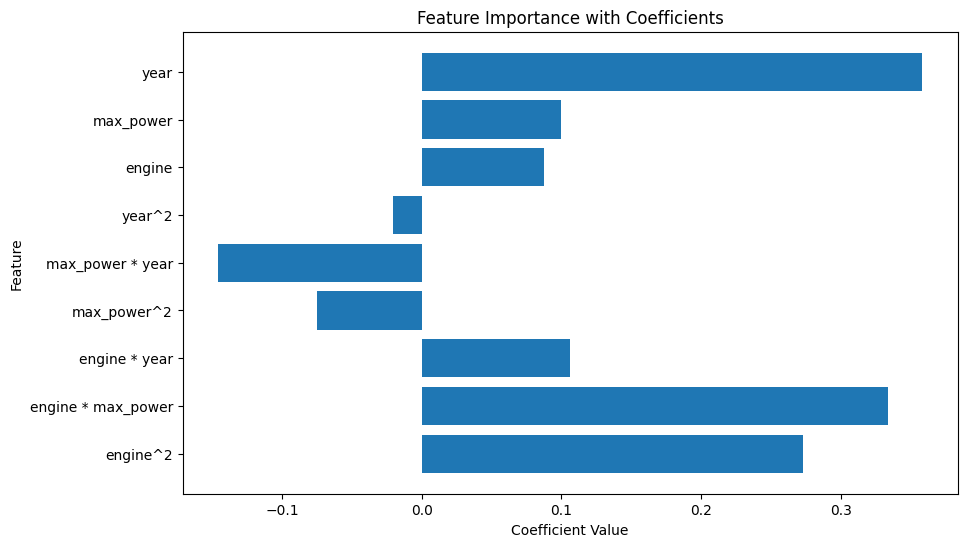

In [25]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = newest_model._coef()  


feature_names = ['engine^2', 'engine * max_power', 'engine * year', 'max_power^2', 'max_power * year', 'year^2', 'engine', 'max_power', 'year']

plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance with Coefficients')

# Display the plot
plt.show()

You will see that year and some combination  of  engine and max_power have the high magnetude to control the output of model

In [26]:
#load the model with normal feature 
normal_model = pickle.load(open('./model.pkl', 'rb'))

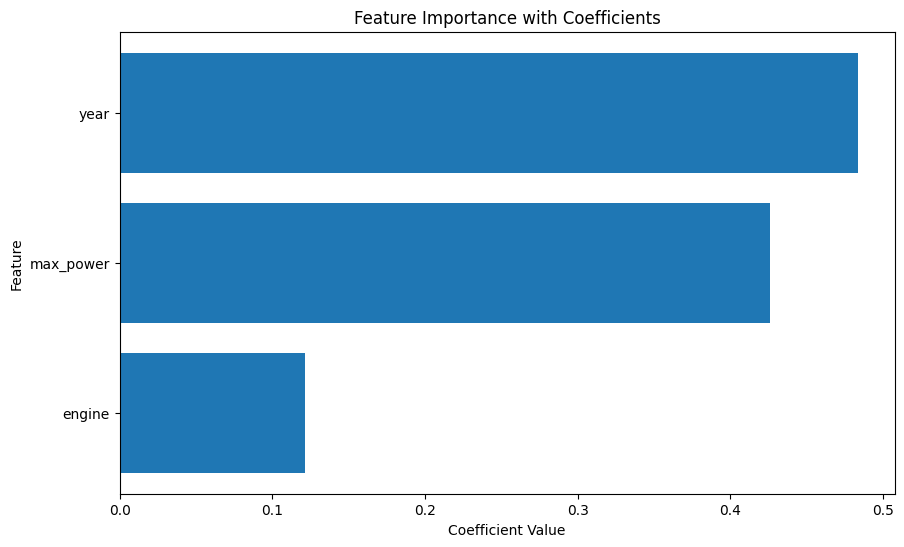

In [31]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = normal_model._coef()  


feature_names = ['engine', 'max_power', 'year']

plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance with Coefficients')

# Display the plot
plt.show()

you will see that year is also the highest magnitude for model 

The choice of learning rate can significantly impact the performance of the model. In my case, a learning rate of 0.01 has proven to be the most effective.
![Alt text](picture/image.png)
Regarding the initialization of weights, it doesn't have a substantial impact on the model's performance.
![Alt text](picture/image-3.png)
However, it's worth noting that using stochastic batch gradient descent tends to lead to the highest R-squared score.
![Alt text](picture/image-2.png)

In this assignment, we extended our knowledge of linear regression by implementing and experimenting with a custom LinearRegression class. We  incorporated key enhancements such as the computation of the R-squared score, improved weight initialization using the Xavier method, and the option to use momentum-based gradient descent. Additionally, we added a feature importance plotting function.


In the experiment part we found that :

The choice of learning rate significantly impacts model performance, with a learning rate of 0.01 generally producing the best results.
Weight initialization, while important, had a more moderate impact on model performance, with Xavier initialization providing a slight advantage.
The incorporation of momentum in gradient descent led to faster convergence and reduced oscillation, making it a valuable technique for improving model training.
Cross-validation allowed us to compare different regression techniques, batch types, initialization methods, and learning rates, providing a comprehensive view of their effects on model performance.